In [50]:
from passwords import user, password, ip_address
from sqlalchemy import create_engine
engine = create_engine('postgresql://' + user + ':' + password + '@' + ip_address + '/PH_Employee_Archive')
connection = engine.connect()

ValueError: invalid literal for int() with base 10: ''

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [6]:
title_df = pd.read_csv('../Resources/titles.csv')
employee_df = pd.read_csv('../Resources/employees.csv')
salary_df = pd.read_csv('../Resources/salaries.csv')
dept_df = pd.read_csv('../Resources/departments.csv')
dept_man_df = pd.read_csv('../Resources/dept_manager.csv')
dept_emp_df = pd.read_csv('../Resources/dept_emp.csv')

In [7]:
employee_df = employee_df.rename(columns = {'emp_title_id' : 'title_id'})
employee_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


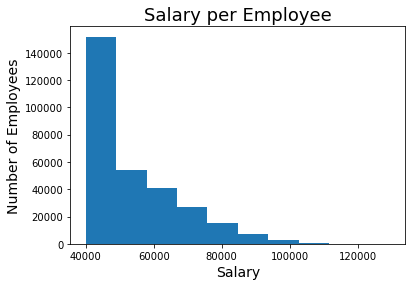

In [17]:
plt.hist(salary_df['salary'])
plt.title('Salary per Employee', fontsize=18)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.savefig("../Images/salaryhist.png",  bbox_inches="tight")
plt.show()

In [11]:
emp_title_sal_df = salary_df.merge(dept_emp_df, on='emp_no')
emp_title_sal_df = emp_title_sal_df.merge(employee_df, on='emp_no')
emp_title_sal_df = emp_title_sal_df.merge(title_df, on='title_id')
emp_title_sal_df

,emp_no,salary,dept_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,d005,e0003,9/2/1953,Georgi,Facello,M,6/26/1986,Senior Engineer
1,10003,40006,d004,e0003,12/3/1959,Parto,Bamford,M,8/28/1986,Senior Engineer
2,10004,40054,d004,e0003,5/1/1954,Chirstian,Koblick,M,12/1/1986,Senior Engineer
3,10006,40000,d005,e0003,4/20/1953,Anneke,Preusig,F,6/2/1989,Senior Engineer
4,10009,60929,d006,e0003,4/19/1952,Sumant,Peac,F,2/18/1985,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
331598,111534,48077,d008,m0001,6/27/1952,Hilary,Kambil,F,1/31/1988,Manager
331599,111692,40000,d009,m0001,10/5/1954,Tonny,Butterworth,F,1/1/1985,Manager
331600,111784,40000,d009,m0001,6/14/1956,Marjo,Giarratana,F,2/12/1988,Manager
331601,111877,53846,d009,m0001,10/18/1962,Xiaobin,Spinelli,F,8/17/1991,Manager


In [12]:
title_group = emp_title_sal_df.groupby('title')
avg_salary = title_group.mean()
avg_salary

,emp_no,salary
title,,
Assistant Engineer,254103.701757,48615.074794
Engineer,253524.102625,48533.339845
Manager,110780.833333,51531.041667
Senior Engineer,253126.972571,48505.714313
Senior Staff,254320.012266,58557.394072
Staff,253351.855077,58460.049489
Technique Leader,252100.485472,48574.320997


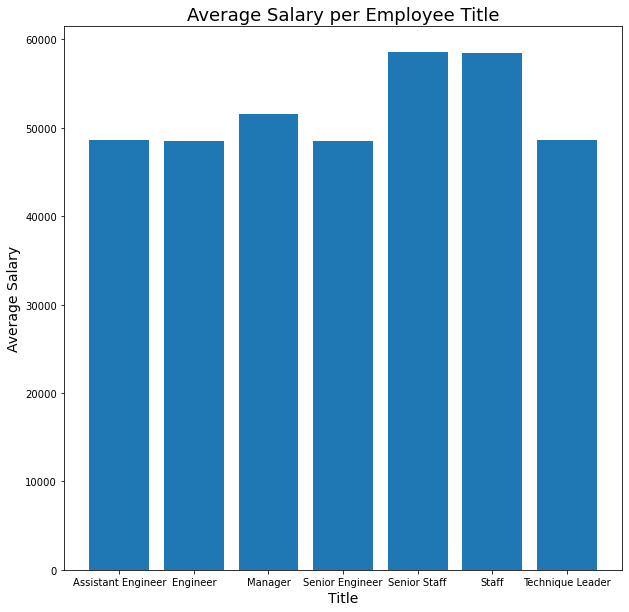

In [14]:
x_axis = avg_salary.index.to_list()
plt.figure(figsize=(10,10))
plt.bar(x_axis, avg_salary['salary'])
plt.title('Average Salary per Employee Title', fontsize=18)
plt.xlabel('Title', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.savefig("../Images/salarybar.png")
plt.show()

In [15]:
employee_df.dtypes

emp_no         int64
title_id      object
birth_date    object
first_name    object
last_name     object
sex           object
hire_date     object
dtype: object

In [16]:
my_ee_info= employee_df.loc[employee_df['emp_no'] == 499942]
my_ee_info

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997
